# Informações da Bolsa de Valores - Python para finanças!
### Por Germano Yoneda

In [6]:
#pip install pandas numpy seaborn yfinance matplotlib pandas-datareader

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import warnings
warnings.filterwarnings('ignore')

In [8]:
ibov = yf.Ticker('^BVSP')

In [10]:
ibov.info['currency']

'BRL'

In [11]:
ibov_df = ibov.history()

In [12]:
ibov_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-07-14,98699.0,100632.0,98289.0,100440.0,10019400,0,0
2020-07-15,100444.0,102114.0,100444.0,101791.0,9285600,0,0
2020-07-16,101791.0,101792.0,100160.0,100553.0,8127100,0,0
2020-07-17,100554.0,103017.0,100554.0,102888.0,10429400,0,0
2020-07-20,102888.0,104439.0,102744.0,104426.0,8931800,0,0


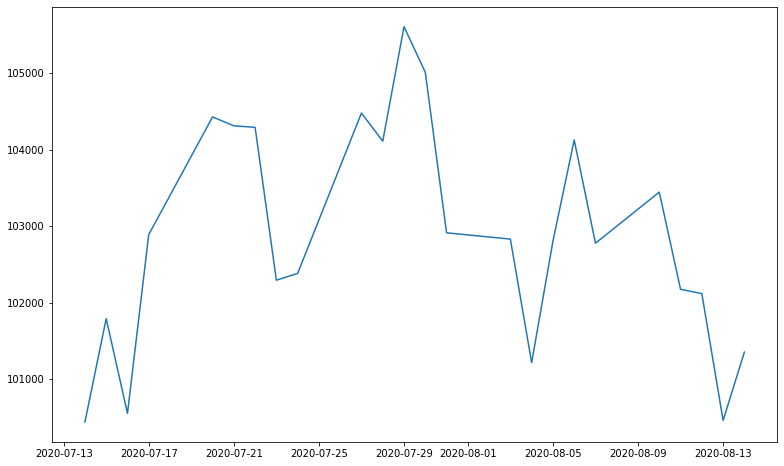

In [13]:
plt.figure(figsize=[13,8])
plt.plot(ibov_df['Close']);

## Explorando um pouco mais:
O método `.history()` aceita os seguintes parâmetros/argumentos:
   - period: : período a ser computado 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y ,5y, 10y, ytd ,max
   - interval : Intervalo dos dados 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
   - start, end : no formato (YYYY-MM-DD), só utilizar start & end ou period
   - prepost: Incluir dados pré/pós mercado? Padrão False
   - auto_adjust: ajustar todos OHLC (Open-high-low-close chart) automaticamente ? (padrão True)
   - actions: Baixar também os dividendos e os desdobramentos?
   

 Yahoo finance funciona melhor com ações estrangeiras, vejamos!

In [15]:
aapl = yf.Ticker("AAPL").history(period='max',actions=True)
aapl.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.40,0.41,0.40,0.40,117258400,0.0,0.0
1980-12-15,0.39,0.39,0.38,0.38,43971200,0.0,0.0
1980-12-16,0.36,0.36,0.36,0.36,26432000,0.0,0.0
1980-12-17,0.36,0.37,0.36,0.36,21610400,0.0,0.0
1980-12-18,0.38,0.38,0.38,0.38,18362400,0.0,0.0


In [16]:
aapl = aapl.drop(['Dividends', 'Stock Splits'],axis=1)

In [17]:
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.40,0.41,0.40,0.40,117258400
1980-12-15,0.39,0.39,0.38,0.38,43971200
1980-12-16,0.36,0.36,0.36,0.36,26432000
1980-12-17,0.36,0.37,0.36,0.36,21610400
1980-12-18,0.38,0.38,0.38,0.38,18362400


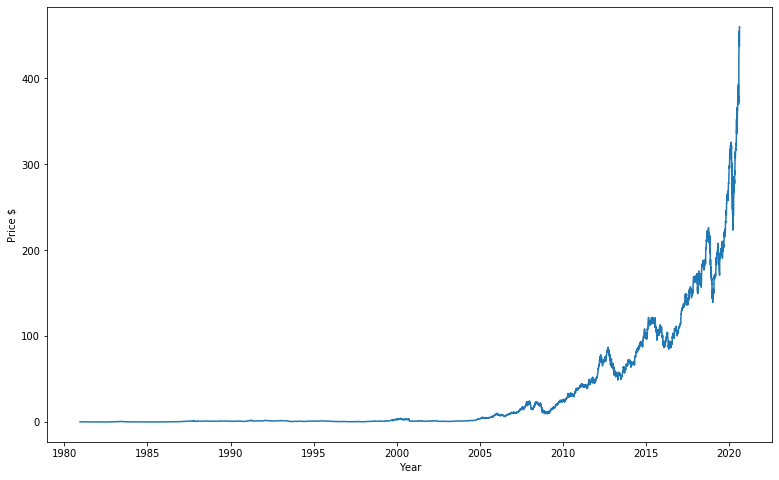

In [18]:
plt.figure(figsize=[13,8])
plt.plot(aapl.Close)
plt.xlabel('Year')
plt.ylabel('Price $');

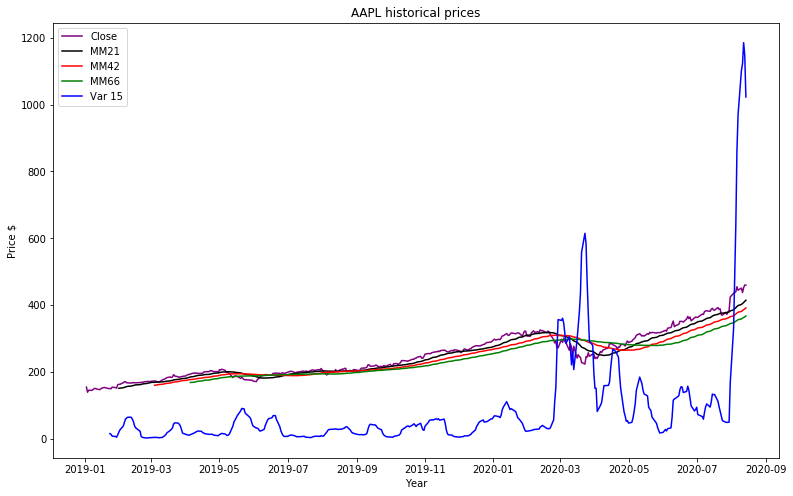

In [19]:
plt.figure(figsize=[13,8])
plt.plot(aapl.Close[aapl.Close.index > '2019'],label='Close',color='purple')
plt.plot(aapl.Close[aapl.Close.index > '2019'].rolling(21).mean(),label='MM21',color='black')
plt.plot(aapl.Close[aapl.Close.index > '2019'].rolling(42).mean(),label='MM42',color='red')
plt.plot(aapl.Close[aapl.Close.index > '2019'].rolling(66).mean(),label='MM66',color='green')
plt.plot(aapl.Close[aapl.Close.index > '2019'].rolling(15).var(),label='Var 15',color='blue')
plt.xlabel('Year')
plt.ylabel('Price $')
plt.title('AAPL historical prices')
plt.legend();

## Removendo a tendência e a sazonalidade!

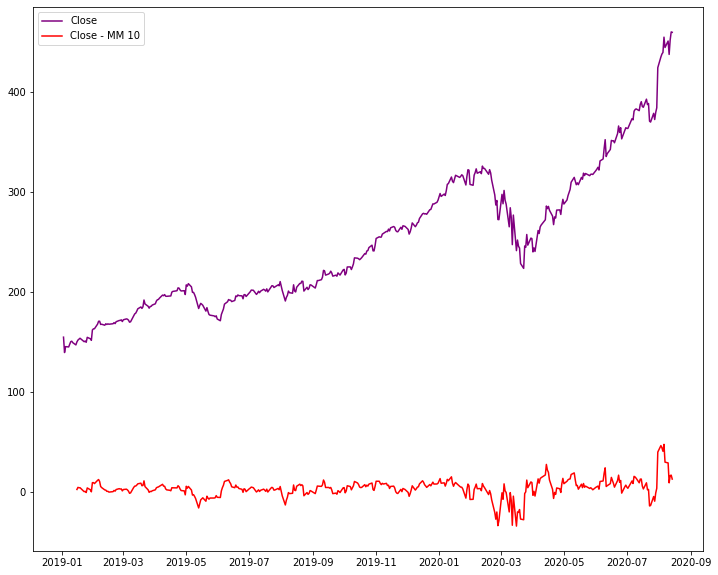

In [20]:
plt.figure(figsize=[12,10])
plt.plot(aapl.Close[aapl.Close.index > '2019'],color='purple',label='Close')
plt.plot(aapl.Close[aapl.Close.index > '2019'] - aapl.Close[aapl.Close.index > '2019'].rolling(10).mean(),color='red',
        label='Close - MM 10')
plt.legend();

In [ ]:
aapl.head()

In [21]:
aapl['MM21'] = aapl.Close.rolling(21).mean()
aapl['MM42'] = aapl.Close.rolling(42).mean()
aapl['MM66'] = aapl.Close.rolling(66).mean()
aapl['Var 15'] = aapl.Close.rolling(15).var()
aapl['Desvio Padrao 15'] = aapl.Close.rolling(15).std()

In [22]:
aapl.head()

,Open,High,Low,Close,Volume,MM21,MM42,MM66,Var 15,Desvio Padrao 15
Date,,,,,,,,,,
1980-12-12,0.40,0.41,0.40,0.40,117258400,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.39,0.39,0.38,0.38,43971200,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.36,0.36,0.36,0.36,26432000,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.36,0.37,0.36,0.36,21610400,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.38,0.38,0.38,0.38,18362400,NaN,NaN,NaN,NaN,NaN


In [23]:
aapl.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume               0
MM21                20
MM42                41
MM66                65
Var 15              14
Desvio Padrao 15    14
dtype: int64

### Preenchendo valores nulos/NaN!


In [24]:
aapl.MM21 = aapl.MM21.fillna(aapl.MM21.mean())
aapl.MM42 = aapl.MM42.fillna(aapl.MM42.mean())
aapl.MM66 = aapl.MM66.fillna(aapl.MM66.mean())
aapl['Var 15'] = aapl['Var 15'].fillna(aapl['Var 15'].var())
aapl['Desvio Padrao 15'] = aapl['Desvio Padrao 15'].fillna(aapl['Desvio Padrao 15'].std())

In [25]:
aapl = aapl.ffill(axis=1)

In [27]:
aapl.head()

,Open,High,Low,Close,Volume,MM21,MM42,MM66,Var 15,Desvio Padrao 15
Date,,,,,,,,,,
1980-12-12,0.40,0.41,0.40,0.40,117258400.0,32.995432,32.656011,32.300213,1393.722866,2.102228
1980-12-15,0.39,0.39,0.38,0.38,43971200.0,32.995432,32.656011,32.300213,1393.722866,2.102228
1980-12-16,0.36,0.36,0.36,0.36,26432000.0,32.995432,32.656011,32.300213,1393.722866,2.102228
1980-12-17,0.36,0.37,0.36,0.36,21610400.0,32.995432,32.656011,32.300213,1393.722866,2.102228
1980-12-18,0.38,0.38,0.38,0.38,18362400.0,32.995432,32.656011,32.300213,1393.722866,2.102228


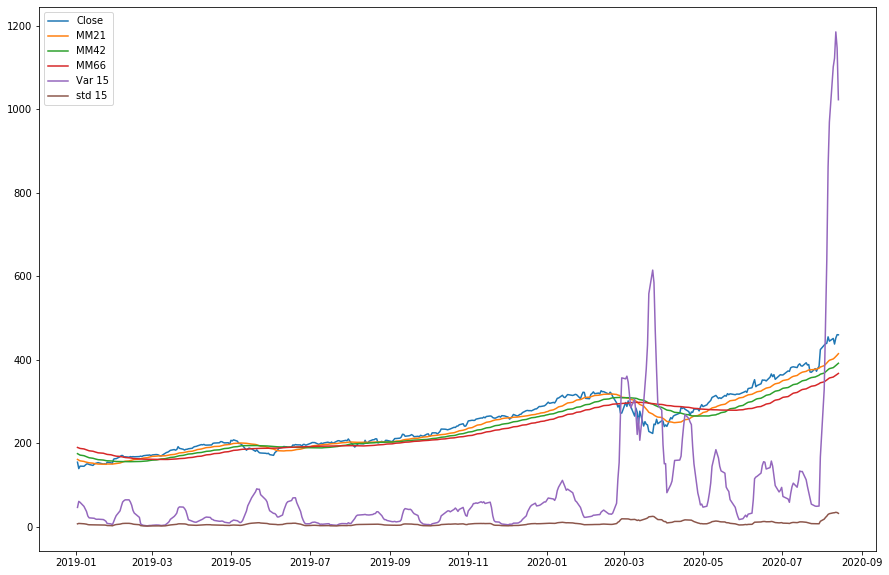

In [28]:
plt.figure(figsize=[15,10])
plt.plot(aapl.Close[aapl.index > '2019'],label='Close')
plt.plot(aapl.MM21[aapl.index > '2019'],label='MM21')
plt.plot(aapl.MM42[aapl.index > '2019'],label='MM42')
plt.plot(aapl.MM66[aapl.index > '2019'],label='MM66')
plt.plot(aapl['Var 15'][aapl.index > '2019'],label='Var 15');
plt.plot(aapl['Desvio Padrao 15'][aapl.index > '2019'],label='std 15');
plt.legend();

In [29]:
msft = yf.Ticker('MSFT').history(period='5y')

In [30]:
msft.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-08-17,42.36,42.94,42.15,42.83,21099700,0.00,0
2015-08-18,42.67,43.21,42.54,43.06,23574100,0.31,0
2015-08-19,42.62,42.89,42.18,42.46,31485500,0.00,0
2015-08-20,41.97,42.33,41.60,41.60,36238200,0.00,0
2015-08-21,41.27,41.43,39.24,39.24,70053100,0.00,0


In [31]:
msft.Dividends.value_counts()

0.00    1239
0.46       4
0.42       4
0.39       4
0.36       4
0.51       3
0.31       1
Name: Dividends, dtype: int64

In [34]:
msft_info = yf.Ticker('MSFT').info
msft_info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, and OneDrive; LinkedIn that includes Talent, Learning, Sales, and Marketing solutions, as well as premium subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consu

In [35]:
msft_info.keys()

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'industry', 'previousClose', 'regularMarketOpen', 'twoHundredDayAverage', 'trailingAnnualDividendYield', 'payoutRatio', 'volume24Hr', 'regularMarketDayHigh', 'navPrice', 'averageDailyVolume10Day', 'totalAssets', 'regularMarketPreviousClose', 'fiftyDayAverage', 'trailingAnnualDividendRate', 'open', 'toCurrency', 'averageVolume10days', 'expireDate', 'yield', 'algorithm', 'dividendRate', 'exDividendDate', 'beta', 'circulatingSupply', 'startDate', 'regularMarketDayLow', 'priceHint', 'currency', 'trailingPE', 'regularMarketVolume', 'lastMarket', 'maxSupply', 'openInterest', 'marketCap', 'volumeAllCurrencies', 'strikePrice', 'averageVolume', 'priceToSalesTrailing12Months', 'dayLow', 'ask', 'ytdReturn', 'askSize', 'volume', 'fiftyTwoWeekHigh', 'forwardPE', 'fromCurrency', 'fiveYearAvgDividendYield', 'fiftyTwoWeekLow', 'bid', 'tradeable', 'divi

In [36]:
msft_info['country']

'United States'

In [37]:
#Não funciona tão bem com ações BR
petr_info = yf.Ticker('PETR4.SA').info
petr_info

{'zip': '20031-912',
 'sector': 'Energy',
 'fullTimeEmployees': 57983,
 'longBusinessSummary': 'PetrÃ³leo Brasileiro S.A. - Petrobras produce and sells oil and gas in Brazil and internationally. It engages in prospecting, drilling, refining, processing, trading, and transporting crude oil from producing onshore and offshore oil fields, and shale or other rocks, as well as oil products, natural gas, and other liquid hydrocarbons. The company operates through Exploration and Production; Refining, Transportation and Marketing; Gas and Power; and Corporate and Other Businesses segments. The Exploration and Production segment explores for, develops, and produces crude oil, natural gas liquids, and natural gas primarily for supplies to the its domestic refineries. The Refining, Transportation and Marketing segment is involved in the refining, logistics, transport, and trading of crude oil and oil products; exportation of ethanol; and extraction and processing of shale, as well as holding int

In [38]:
itub_dados = pdr.get_data_yahoo("ITUB3.SA", period='3y')

[*********************100%***********************]  1 of 1 completed


In [39]:
itub_dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-14,22.799999,23.393299,22.786699,23.126699,19.626202,253050
2017-08-15,23.100000,23.400000,23.080000,23.200001,19.917498,125100
2017-08-16,23.126699,23.573299,23.126699,23.360001,20.054853,135450
2017-08-17,23.366699,23.366699,22.953300,23.133301,19.860237,72150
2017-08-18,23.113300,23.533300,23.093300,23.533300,20.203642,144000


In [ ]:
#Salvando em um csv!
itub_dados.to_csv('ITUB3.csv',index=False)

In [40]:
#Obtendo multiplos stocks ao mesmo tempo
sanb_itub = yf.download("SANB3.SA ITUB3.SA", period='3y')

[*********************100%***********************]  2 of 2 completed


In [41]:
sanb_itub.tail()

Adj Close               Close                High           \
             ITUB3.SA SANB3.SA   ITUB3.SA SANB3.SA   ITUB3.SA SANB3.SA   
Date                                                                     
2020-08-10  24.330000    14.50  24.330000    14.50  24.480000    14.55   
2020-08-11  24.150000    14.27  24.150000    14.27  24.700001    14.98   
2020-08-12  24.049999    14.30  24.049999    14.30  24.530001    14.69   
2020-08-13  23.400000    13.95  23.400000    13.95  24.250000    14.64   
2020-08-14  23.400000    13.92  23.400000    13.92  23.969999    14.06   

                  Low                Open            Volume           
             ITUB3.SA SANB3.SA   ITUB3.SA SANB3.SA ITUB3.SA SANB3.SA  
Date                                                                  
2020-08-10  24.040001    14.14  24.150000    14.14   413900   169600  
2020-08-11  24.150000    14.27  24.650000    14.52   307700   120100  
2020-08-12  23.750000    14.04  24.299999    14.37   690000    99500  
2020-08-13  23.400000    13.93  24.110001    14.64   609300   170700  
2020-08-14  23.240000    13.69  23.400000    14.00   503500   154500